<a href="https://colab.research.google.com/github/szostaklab/AI_PPP_Ribozyme/blob/main/pppLandscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries
!pip install decorator==5.0.9
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
!pip install Levenshtein
from Levenshtein import distance as levenshtein_distance
from sklearn.cluster import KMeans
import collections
import random
random.seed(10)

In [2]:
#Define functions and constants

rs1 = 'GAATGCTGCCAACCGTGCGGGCTAATTGGCAGACTGAGCT'
quality_cutoff = 0.9 

def seqmatch(seq1, seq2):
  overall = 0
  overlap = 0
  for pos in range(len(seq1)):
    overall+=1
    if seq1[pos] == seq2[pos]:
      overlap+=1
  return overlap/overall

#https://www.geeksforgeeks.org/building-an-undirected-graph-and-finding-shortest-path-using-dictionaries-in-python/
# Python implementation to find the
# shortest path in the graph using
# dictionaries

# Function to find the shortest
# path between two nodes of a graph
def BFS_SP(graph, start, goal):
	explored = []
	
	# Queue for traversing the
	# graph in the BFS
	queue = [[start]]
	
	# If the desired node is
	# reached
	if start == goal:
		print("Same Node")
		return
	
	# Loop to traverse the graph
	# with the help of the queue
	while queue:
		path = queue.pop(0)
		node = path[-1]
		
		# Condition to check if the
		# current node is not visited
		if node not in explored:
			neighbours = graph[node]
			
			# Loop to iterate over the
			# neighbours of the node
			for neighbour in neighbours:
				new_path = list(path)
				new_path.append(neighbour)
				queue.append(new_path)
				
				# Condition to check if the
				# neighbour node is the goal
				if neighbour == goal:
					return new_path
			explored.append(node)

	# Condition when the nodes
	# are not connected
	return 0

# Python implementation to find the
# shortest path in the graph using
# dictionaries
 
# Function to find the shortest
# path between two nodes of a graph
def BFS_SP(graph, start, goal):
    explored = []
     
    # Queue for traversing the
    # graph in the BFS
    queue = [[start]]
     
    # If the desired node is
    # reached
    if start == goal:
        print("Same Node")
        return
     
    # Loop to traverse the graph
    # with the help of the queue
    while queue:
        path = queue.pop(0)
        node = path[-1]
         
        # Condition to check if the
        # current node is not visited
        if node not in explored:
            neighbours = graph[node]
             
            # Loop to iterate over the
            # neighbours of the node
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                 
                # Condition to check if the
                # neighbour node is the goal
                if neighbour == goal:
                    return new_path
            explored.append(node)
 
    # Condition when the nodes
    # are not connected
    return 0
 

In [3]:
#Upload raw seqs
raw_seqs = []
for round in range(1,7):
    raw_seqs.append(open('/Users/zoeweiss/Desktop/Desktop/lab(s)/szostak/spring 2022/ppp landscape/seqs/ppp-'+str(round)+'_S'+str(round)+'_L001_R2_001.fastq').readlines())

#Filter by quality
all_high_quality = []
unique_high_quality = []
for round in raw_seqs:
    high_quality = []
    seqs = round[1::4]
    qualities = round[3::4]
    acceptable_quals_1_percent_error = [5,6,7,8,9,':',';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
    for seq in range(len(qualities)):
        overlap=0
        for char in list(set(qualities[seq]).intersection(acceptable_quals_1_percent_error)):
            overlap+=qualities[seq].count(char)
        if overlap/len(qualities[1])>quality_cutoff:
            high_quality.append(seqs[seq].strip("\n"))
    print('High quality seqs r'+str(1+raw_seqs.index(round))+': '+str(len(high_quality)))
    all_high_quality.append(high_quality)
    unique_high_quality.append(list(set(high_quality)))
    print('Unique high quality seqs r'+str(1+raw_seqs.index(round))+': '+str(len(list(set(high_quality)))))
    

High quality seqs r1: 1793335
Unique high quality seqs r1: 1658322
High quality seqs r2: 1824368
Unique high quality seqs r2: 1617437
High quality seqs r3: 1238531
Unique high quality seqs r3: 301725
High quality seqs r4: 1959238
Unique high quality seqs r4: 136149
High quality seqs r5: 1553726
Unique high quality seqs r5: 115878
High quality seqs r6: 1515844
Unique high quality seqs r6: 126708


In [4]:
#Trim seqs to randomized region
all_trimmed_seqs = []
all_unique_trimmed_seqs = []
round = 1
for round in range(len(all_high_quality)):
    trimmed_seqs = []
    for seq in all_high_quality[round]:
        if 'ACTCACTGACACAGATCCACTCACGGACAGCG' in seq and 'CGCTGTCC' in seq:
            if len(seq[len('ACTCACTGACACAGATCCACTCACGGACAGCG')+seq.index('ACTCACTGACACAGATCCACTCACGGACAGCG'):seq.index('CGCTGTCC')]) == 40:
                trimmed_seqs.append(seq[len('ACTCACTGACACAGATCCACTCACGGACAGCG')+seq.index('ACTCACTGACACAGATCCACTCACGGACAGCG'):seq.index('CGCTGTCC')])
    all_trimmed_seqs.append(trimmed_seqs)
    all_unique_trimmed_seqs.append(list(set(trimmed_seqs)))


In [5]:
#Cluster top sequences
k=12
matrix = np.asarray([np.fromstring(str(s), dtype=np.uint8) for s in all_unique_trimmed_seqs[-1]]);
kmeans = KMeans(init="random", n_clusters=k,n_init=10,max_iter=300,random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_[:]

all_clusters = []
for cluster_num in range(0, k):
  seqs_in_cluster = []
  for seq in range(len(labels)):
    if labels[seq] == cluster_num:
      seqs_in_cluster.append(all_unique_trimmed_seqs[-1][seq])
  all_clusters.append(seqs_in_cluster)

order_of_clusters = []
for rank in labels:
    if rank not in order_of_clusters:
        order_of_clusters.append(rank)
all_clusters_ordered = []
for cluster_num in order_of_clusters:
    all_clusters_ordered.append(all_clusters[cluster_num])

<ipython-input-5-bd351d65844e>:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  matrix = np.asarray([np.fromstring(str(s), dtype=np.uint8) for s in all_unique_trimmed_seqs[-1]]);


In [6]:
#Make spreadsheet with cluster assignments
reads = list(collections.Counter(all_trimmed_seqs[-1]).values())
seqs = list(collections.Counter(all_trimmed_seqs[-1]).keys())
clusters = []
for seq in seqs:
    clusters.append(labels[all_unique_trimmed_seqs[-1].index(seq)])


In [7]:
sorted_assignments = []
for seq in range(len(seqs)):
    sorted_assignments.append([seqs[seq], reads[seq], clusters[seq]])
sorted_assignments = sorted(sorted_assignments, key=lambda x: x[1])[::-1]


f = open("/Users/zoeweiss/Desktop/Desktop/lab(s)/szostak/spring 2022/ppp landscape/ppp_new_cluster_assignments.csv", "w")
f.write('Seq'+','+'Reads'+','+'Cluster'+'\n')
for seq in range(len(sorted_assignments)):
    f.write(str(sorted_assignments[seq][0]))
    f.write(',')
    f.write(str(sorted_assignments[seq][1]))
    f.write(',')
    f.write(str(sorted_assignments[seq][2]))
    f.write('\n')
    #f.write(all_unique_trimmed_seqs[-1][seq]+','+str(labels[seq])+str(list(collections.Counter(all_trimmed_seqs[-1]).values())[list(collections.Counter(all_trimmed_seqs[-1]).keys()).index(all_unique_trimmed_seqs[-1][seq])])+'\n')
f.close()


In [8]:
#Find peak seqs
peak_seqs = []
peak_clusters = []
top_seqs = collections.Counter(all_trimmed_seqs[-1]).most_common(10000)

i = 0
while len(peak_clusters)<11:
    top_seq = top_seqs[i]
    for cluster in all_clusters_ordered:
        if top_seq[0] in cluster:
            if all_clusters_ordered.index(cluster) not in peak_clusters:
                peak_clusters.append(all_clusters_ordered.index(cluster))
                peak_seqs.append(top_seq[0])
                print(top_seq)
    i+=1

('GACAGCCGAGAAATGAGTGGCCTAAATGGGAGAATGAGCT', 143854)
('GACTGCGCGTATGAGTGGCGGCTAAAGAGGAGAATGAGCG', 125090)
('ACGGGTGGGTAATCTAGTGTCCGCGGAATAGAACGAAACA', 94478)
('GACTGGCGCCAACTGAGCGGCCTAATTGGGAGAATGAGGG', 1131)
('GGAGGGTGACATCGTTGAGAGAGAATGGGGATATTGAACT', 713)
('ACAAGCGACGAATGGTGCGGGTTAATTGGTGGGGTGATCT', 252)
('GACGGCGAAGATGGGAACGGGCTAATTAGGAGAATGTACT', 160)
('AAGTGATGAATTCCCTGCGGGCTACTTGTTAGAGCGGGCT', 155)
('GTGTGTTACGAACCGTGGCGACTAAGCGGGAGGGTGAACT', 121)
('AGGGCAGAGAGTGGTCCGCGGTTAAAGTACTATCCCCTTA', 41)
('GAGTGATGAAATCCTTGCGGGCTAGTTGGCAGACTGAACT', 37)


In [9]:
#Plot dynamics
#Count each peak in each round
all_peak_counts = []
for peak in peak_seqs:
    counts = []
    for round in range(len(all_trimmed_seqs)):
        counts.append(all_trimmed_seqs[round].count(peak))
    all_peak_counts.append(counts)

#Count RS1 in each round
all_rs1_counts = []
for round in range(len(all_trimmed_seqs)):
    all_rs1_counts.append(all_trimmed_seqs[round].count(rs1))

#Find total counts
all_total_counts = []
for round in range(len(all_trimmed_seqs)):
  all_total_counts.append(len(all_trimmed_seqs[round]))

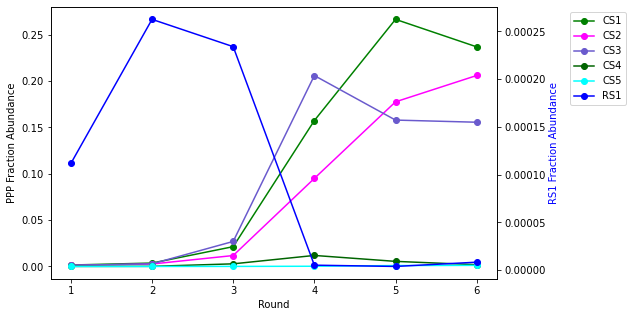

In [10]:
#Plot the dynamics
palate = ['green', 'magenta', 'slateblue', 'darkgreen', 'cyan', 'lightgreen', 'turquoise', 'lime', 'royalblue', 'skyblue', 'navy']

fig, ax1 = plt.subplots(figsize = (8,5))

lns = []
ax2 = ax1.twinx()

counter = 0
for seq in all_peak_counts[:5]:
    lns+= ax1.plot(range(1,7), np.array(seq)/np.array(all_total_counts), marker = 'o', color = palate[counter], label = 'CS'+str(1+all_peak_counts.index(seq)))
    counter+=1
lns+= ax2.plot(range(1,7), np.array(all_rs1_counts)/np.array(all_total_counts), marker = 'o', color = 'blue', label = 'RS1')

ax1.set_xlabel('Round')
ax1.set_ylabel('PPP Fraction Abundance')
ax2.set_ylabel('RS1 Fraction Abundance')
ax2.yaxis.label.set_color('blue')

# added these three lines
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, bbox_to_anchor = (1.3,1))

plt.show()

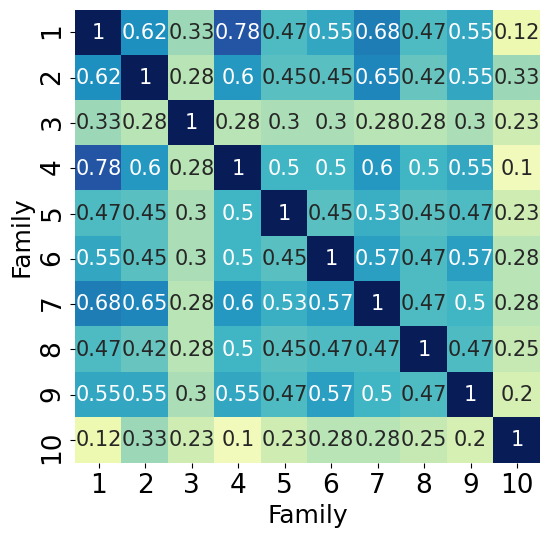

In [11]:
#How similar are the peak sequences
all_overlap = []
for seq1 in peak_seqs[:10]:
  overlap = []
  for seq2 in peak_seqs[:10]:
    overlap.append(seqmatch(seq1, seq2))
  all_overlap.append(overlap)

yticklabels = list(range(1, 11))
xticklabels = list(range(1, 11))

fig = plt.figure(num=1, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')


ax = sns.heatmap(all_overlap, cbar=False, annot=True, annot_kws={"fontsize":15}, cmap="YlGnBu", yticklabels=yticklabels ,xticklabels=xticklabels,  vmin=0, vmax=1)
ax.set_ylabel('Family', fontsize=18)
ax.set_xlabel('Family', fontsize=18)
    
ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)



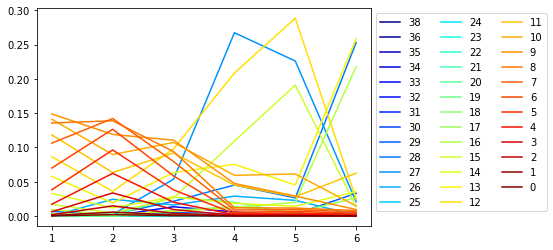

In [12]:
#Number of possible mutants - track single, double, triple, 4, 5 mutants across rounds

all_overlaps = []
for round in all_trimmed_seqs:
    overlaps = []
    for seq in round:
        overlaps.append(seqmatch(seq, rs1))
    all_overlaps.append(overlaps)

mutant_freqs = []
for round in range(len(all_overlaps)):
    #mutant_freqs.append(sorted([(k,v) for k,v in dict(collections.Counter(all_overlaps[round])).items()], key=lambda x: x[0])[-15:])
    mutant_freqs.append(sorted([(k,v) for k,v in dict(collections.Counter(all_overlaps[round])).items()], key=lambda x: x[0]))

round_counts = []
for round in all_trimmed_seqs:
    round_counts.append(len(round))
    
#start = 20
start = 0
colors = plt.cm.jet(np.linspace(0,1,len(mutant_freqs[0])-start))

for mut_num in range(len(mutant_freqs[0])):
#for mut_num in range(start,len(mutant_freqs[0])):

    tracking_muts = []
    for round in range(len(mutant_freqs)):
        for mut_num_test in range(len(mutant_freqs[round])):
            if mutant_freqs[round][mut_num_test][0] == mutant_freqs[0][mut_num][0]:
                tracking_muts.append(mutant_freqs[round][mut_num][1]/round_counts[round])

    plt.plot(range(1, 1+len(tracking_muts)), tracking_muts, label = str(int(40-mutant_freqs[0][mut_num][0]*40)), color=colors[mut_num-start])
plt.legend(bbox_to_anchor = (1,1), ncol=3)


In [13]:
#Connections between sequences - which sequences are "close" to CS1 or CS7
start = 'GACAGCCGAGAAATGAGTGGCCTAAATGGGAGAATGAGCT'
end = 'GACTGCGCGTATGAGTGGCGGCTAAAGAGGAGAATGAGCG'

connected_counts = []
for seq in list(set(all_trimmed_seqs[-1])):
  if seqmatch(seq.strip(), start)>.6:
    if seqmatch(seq.strip(), end)>.6:
        connected_counts.append(seq)
connected_counts = list(set(connected_counts))
print(len(connected_counts))

2641


In [14]:
#Connection Matrix
connections = [ [ 0 for i in range(len(connected_counts)) ] for j in range(len(connected_counts)) ]
print(len(connected_counts))
for seq2 in range(len(connected_counts)):
  if seq2%100 == 0:
    print(seq2)
  for seq1 in range(len(connected_counts)):
    if int(seqmatch(connected_counts[seq1], connected_counts[seq2])*len(connected_counts[seq1])) == (len(connected_counts[seq1])-1):
      connections[seq1][seq2] = 1
connections_orig = connections

2641
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600


Text(0.5, 1.0, 'k=12')

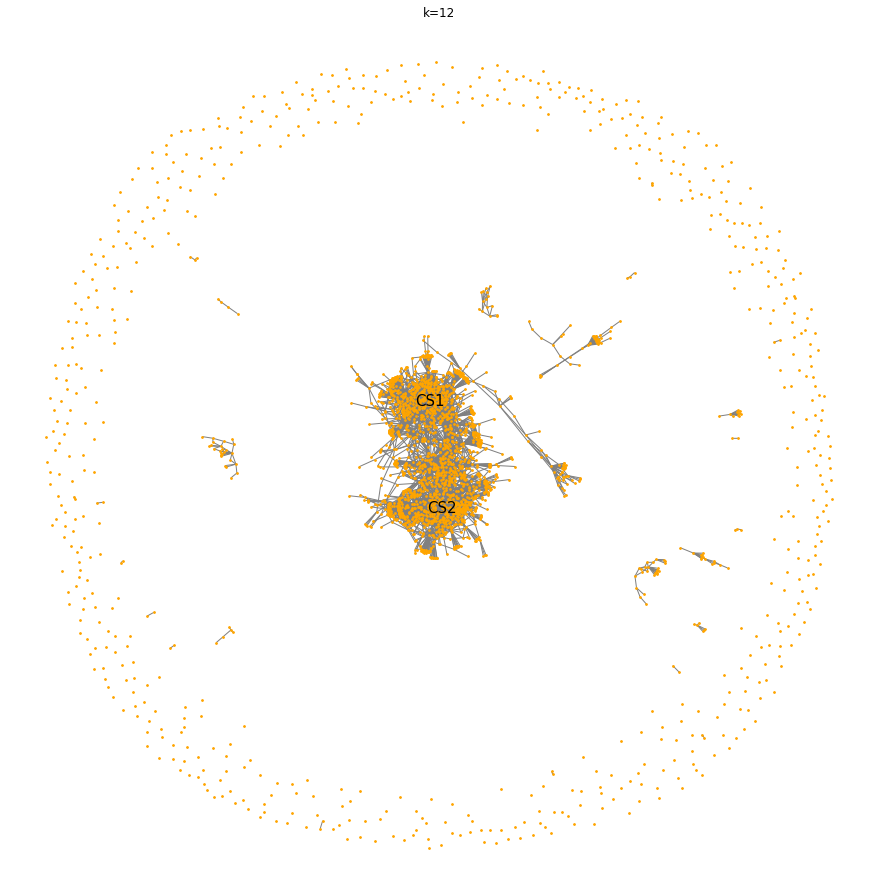

In [15]:
labeldict = {}

labeldict[connected_counts.index(start)] = 'CS1'
labeldict[connected_counts.index(end)] = 'CS2'


G = nx.from_numpy_matrix(np.array(connections))
plt.figure(figsize=(12,12)) 
#labeldict = {connections.index(connections[(connected_counts.index(rs1))]):'RS1'}
#for peak in range(len(peak_seqs)):
#    labeldict[connections.index(connections[(connected_counts.index(peak_seqs[peak]))])] = 'CS'+str(1+peak)
nx.draw(G, with_labels=True, labels = labeldict, font_color = 'black', node_color='orange', node_size=3, edge_color='grey', linewidths=1, font_size=15)
#nx.draw(G, font_color = 'black', node_color='orange', node_size=3, edge_color='grey', linewidths=1, font_size=15)
plt.title('k='+str(k))

In [16]:
graph = {}
for element in range(len(connections_orig)):
    if element%1000==0:
        print(str(element)+'/'+str(len(connections_orig)))
    cons = []
    for col in range(len(connections_orig[element])):
        if connections_orig[element][col]!=0:
            cons.append(col)
    graph[element] = cons

0/2641
1000/2641
2000/2641


In [17]:
(BFS_SP(graph, connected_counts.index(peak_seqs[0]), connected_counts.index(peak_seqs[3])))           

ValueError: 'GACTGGCGCCAACTGAGCGGCCTAATTGGGAGAATGAGGG' is not in list

In [ ]:
close = []
for seq in all_unique_trimmed_seqs[-1]:
    if seqmatch(end, start)>.65:
        close.append(seq)
        path = (BFS_SP(graph, connected_counts.index(start), connected_counts.index(seq)))           
        if path!=0:
            print(path)
        